## Aula: Lei de Biot-Savart
***

### Objetivos:

-  Resolver analiticamente o campo produzido por uma corrente elétrica.
-  Modelar computacionalmente o problema.
-  Aprender a resolver uma integral usando a linguagem Python.
-  Aprender a montar e visualizar um gráfico tridimensional.
-  Analisar o comportameno físico de forma interativa modificando os parâmetros do modelo.

A Figura abaxio ilustra um fio sendo perocorrido por uma corrente elétrica $I$. Para calcular o campo magnético utilizamos a Lei de Biot-Savart.

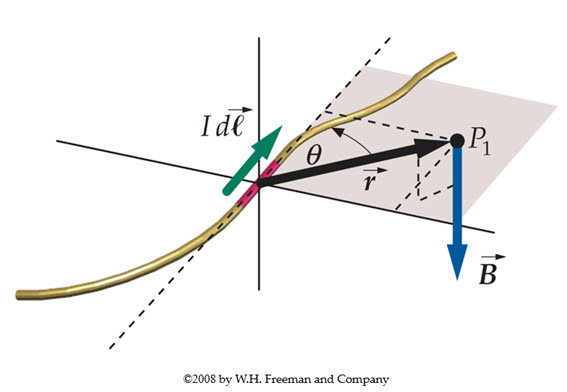

$$
\begin{array}{c}
\Large\Large\vec B = \frac{{\mu _0 }}{{4\pi }}\int {\frac{{Id\vec l \times \hat r}}{{\left| {\vec r} \right|^2 }}}
\end{array}
$$

**sendo:**
-  $\vec B$ é o vetor campo magnético no ponto desejado;
-  $\mu _0$ é a permeabilidade do vácuo;
-  $d\vec l$ é o elemento infinitesimal do comprimento do fio;
-  $\vec r$ é o vetor com a origem no elemento infinitesimal e a extremidade no ponto onde se deseja o campo magnético;
-  $\hat r$ é o versor da direção do vetor $\vec r$.
    

Agora vamos resolver o seguinte exercício. Dado um um fio de com complimento $L$ e percorrido por uma corrente $I$, determine o vetor campo magnético no ponto $P$ indicado na figura a seguir.

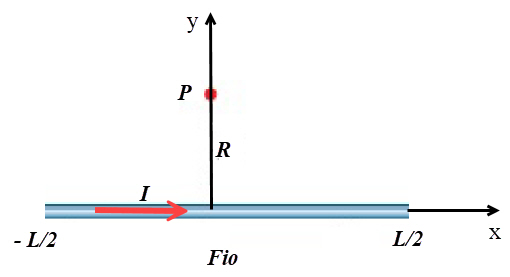

Durante a aula deduzimos analiticamente a expressão para a determinação do campo produzido pelo fio no ponto  $P$:

$$
\begin{array}{c}
\Large \vec B = \frac{{\mu _0 }IR}{{4\pi }}\Large \int_{-L/2}^{L/2} {\frac{{dx}}{({x^2 + R^2})^{3/2}}} \hat k
\end{array}
$$

Para modelar e resolver essa expressão computacionalmente, vamos importar as seguintes bibliotecas:

In [1]:
import matplotlib.pyplot as plt
import scipy.constants as sconst
import scipy.integrate as sint
import numpy as np
import ipywidgets as widgets
from scipy.integrate import quad
from numpy import *
from ipywidgets import interact
#from mpl_toolkits.mplot3d import axes3d

Definindo os argumentos do integrando:

In [2]:
#variavel x, dados R e L
def integrand(x, R):
    return (x**2 + R**2)**(-3/2)

Definindo os parâmtros para a representação gráfica do vetor campo magnético e criando "botões" para variarmos a corrente $I$ (ampère), a distância $R$ (metro) do fio até o ponto $P$  e o comprimento do fio $L$ (metro):

In [3]:
@interact(I=(0.0,10.0,1),R=(0.5,5.0,0.5),L=(1.0,20.0,1.0))
def plot(I=3,R=1.0,L=10.0):

    fig = plt.figure(figsize=(5,5))
    # No parâmetro figsize definimos o tamanho da figura
    ax = fig.add_subplot(111, projection='3d')
    # (É importante que coloquemos o projection = '3d' para indicar que nosso gráfico será em 3 dimensões)
    # Definindo os limites de integração
    LimInf = -L/2
    LimSup = L/2
    #Queremos plotar o vetor campo no ponto P da figura que é:
    xp = 0
    zp = 0 
    yp = R
    #Calculando a integral
    Int = quad(integrand, LimInf, LimSup, args=(R))
    #Analiticamente vimos que as componentes x e y do campo são nulas
    bx = 0
    by = 0
    #Definindo as demais constantes
    mu = 4*pi*10**(-7)
    A = mu*I*R
    #Calculando o valor final do campo
    bz = (A/(4*pi))*Int[0]
    #Desenhendo o vetor no ponto pedido
    ax.quiver(xp, yp, zp, bx, by, bz,color="red", length=1e7)
   
    # Definindo os parâmetros do gráfico e plotando
    ax.plot3D([-L/2,L/2],[0,0],[0,0], color="black", linewidth = 5) # Plotando o fio retilínio
    ax.set_xlim([-5,5])
    ax.set_ylim([-1,5])
    ax.set_zlim([0,8])
    ax.set_xlabel('x (m) ')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z ')
    plt.show()
    print("|B|=",bz,"T")
    

interactive(children=(FloatSlider(value=3.0, description='I', max=10.0, step=1.0), FloatSlider(value=1.0, desc…

**Questões:**

-   Quando a distância do fio ao ponto $P$ aumenta, qual o comportamento observado do vetor campo magnético?
-   Quando $L$ fica muito maior que $R$, qual o comportamento do campo?

**Desafio**

Agora que você aprendeu a modelar esse problema, construa um código que mostre os vetores do campo magnético em todo o espaço.
